# ggplot

### Zhentao Shi



### Terminal Commands

Basic

* mkdir
* cd
* copy

Remote

* top
* screen
* ssh user@address
* start a program

### Advanced R Graphics


**Reference**: [ggplot2 book](http://link.springer.com/book/10.1007%2F978-0-387-98141-3)

* "ggplot2" is a sophisticated graphic system that generates high-quality statistical graphs. 
* "reshape2" is a package dedicated to prepare data frames for "ggplot2".

example: plot the density of two estimators under three different data generating processes.

In [1]:
library(ggplot2)
library(reshape2)

load("big150.Rdata")


# parepare the dataset
big150_1 = big150[, c("typb", "numb",  "b1", "b1_c")]
print(head(big150_1))

big150_1 = melt(big150_1, id.vars = c("typb", "numb"), measure.vars = c("b1", "b1_c"))
names(big150_1)[3] = c("estimator")
print(head(big150_1))

      typb numb           b1        b1_c
12001   FE  150  0.124616242  0.11690387
12002   FE  150  0.267670157  0.25202802
12003   FE  150 -0.030689329 -0.03976746
12004   FE  150  0.121169923  0.11866138
12005   FE  150  0.008300031 -0.02399673
12006   FE  150 -0.026199118 -0.05231120
  typb numb estimator        value
1   FE  150        b1  0.124616242
2   FE  150        b1  0.267670157
3   FE  150        b1 -0.030689329
4   FE  150        b1  0.121169923
5   FE  150        b1  0.008300031
6   FE  150        b1 -0.026199118


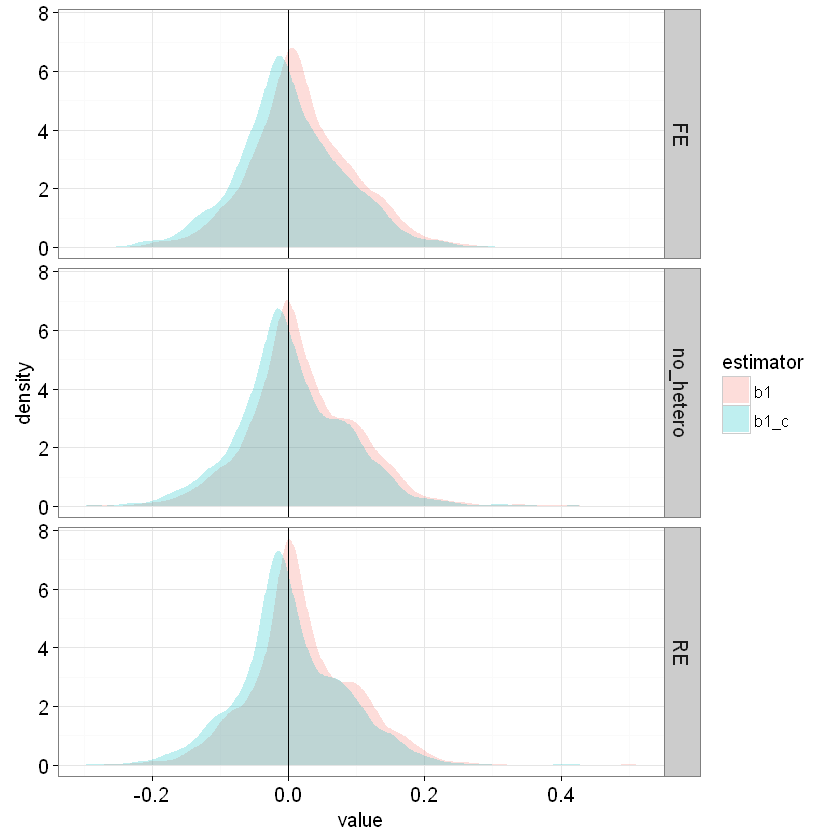

In [2]:
p1 = ggplot(big150_1) 
p1 = p1 + geom_area(stat = "density", alpha = .25, 
                    aes(x = value, fill = estimator),  position = "identity")
p1 = p1 + facet_grid( typb ~ .  )  # this dataset has numb = 150, but no other sample size
p1 = p1 + geom_vline(xintercept = 0)
p1 = p1 + theme_bw()
p1 = p1 + theme(strip.text = element_text( size = 12), 
                axis.text = element_text( size = 12))
print(p1)

### Multiple Graphs in ggplot

This is another example in one of my papers. It generate two subgraphs on one page.

Text are annotated for the graphs.

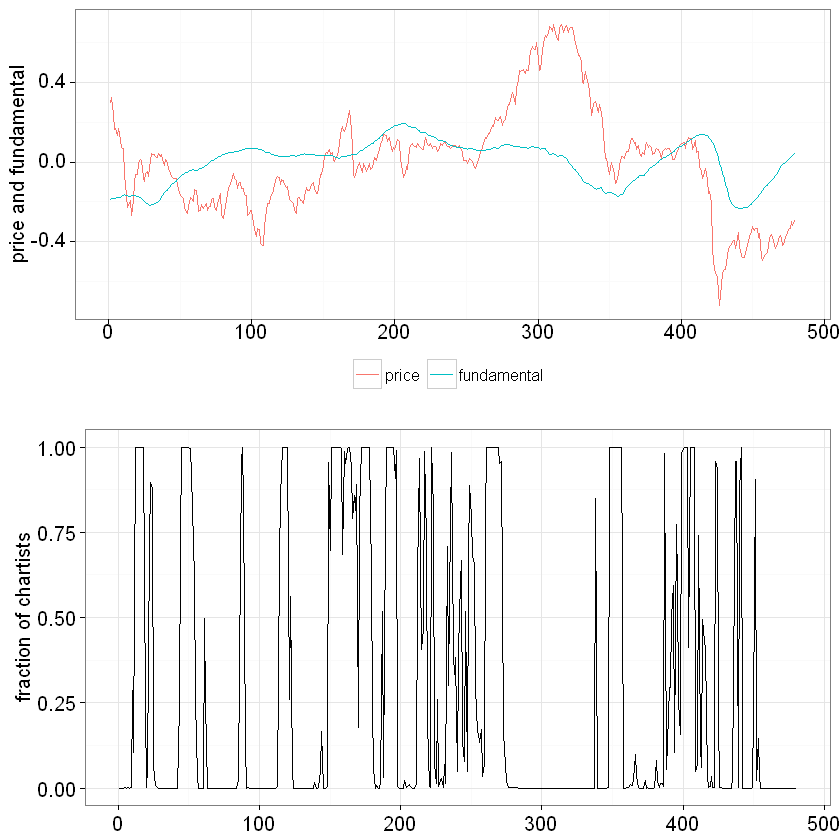

In [3]:
library(lattice)
library(ggplot2)
library(reshape2)
library(gridExtra)

load("multigraph.Rdata") # load data


# unify the theme in the two graphs
theme1 = theme_bw() + theme(axis.title.x = element_blank(), 
                            strip.text = element_text( size = 12), 
                            axis.text = element_text( size = 12),
                            legend.position = "bottom", legend.title = element_blank())

# sub-graph 1
p2 = qplot( x = 1:480, y = m_vec, geom = "line")
p2 = p2 + theme1 + ylab("fraction of chartists")


# sug-graph 2
d2$month = 1:480
p3 = ggplot(d2)
p3 = p3 + geom_line(  aes(x = month, y = value, col = variable) )  
p3 = p3 + theme1 +  ylab("price and fundamental")

# generate the grahp
grid.arrange(p3, p2, nrow=2)